<a href="https://colab.research.google.com/github/Ajinkya1214/ajinkya/blob/master/Assignment3_18110013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import autograd
import autograd.numpy as np2
from autograd import grad
from sklearn.model_selection import KFold

In [2]:
def process_ip(X,param,fit_theta0):

  #add a col of ones at the end if required
  if fit_theta0:
    X = np.insert(X,X.shape[1],np.ones((X.shape[0],)),axis=1)
  
  #initialize the parameters if not already
  if param.shape[0] == 0:
    param = 0.0001*np.zeros((X.shape[1],))
  
  return X , param

In [3]:
def grad_func(xj,y_targt,y_pred):
  #xj = vector of jth component of all examples
  v1 = xj
  v2 = np.subtract(y_pred,y_targt)
  return np.dot(xj,v2)

In [4]:
def sigmoid(a):
  b = 1 + np2.exp(-a)
  return 1/b

In [5]:
def cross_entropy_loss(X,y,theta):

  j_theta = 0
  #compute the cross-entropy loss by looking at all the examples
  for i in range(X.shape[0]):

    y_hat = sigmoid(np2.dot(X[i,:],theta)) #prediction for prob of class 1
    y_gt = y[i]

    loss = y_gt*(np2.log(y_hat)) + (1-y_gt)*(np2.log(1-y_hat))
    j_theta += loss
  
  j_theta = (-1)*j_theta
  
  # print(j_theta)
  return j_theta

In [6]:
def l1_loss(X,y,theta,lmd):

  loss_total = 0
  for i in range(len(theta)):
    loss_total += abs(theta[i])

  loss_total = lmd*loss_total
  jtheta = cross_entropy_loss(X,y,theta)
  loss_total += jtheta

  return loss_total

In [7]:
def l2_loss(X,y,theta,lmd): 

  loss_total = lmd*np2.dot(theta,theta)
  jtheta = cross_entropy_loss(X,y,theta)
  loss_total += jtheta

  return loss_total

In [8]:
def get_accuracy(model,X,y):

  if X.shape[1] != model.param.shape[0]:
    X = np.insert(X,X.shape[1],np.ones((X.shape[0],)),axis=1)
  pred_vector = np.dot(X,model.param)
  pred_vector = np.reshape(pred_vector,(X.shape[0],))
  pred_vector = sigmoid(pred_vector)
  
  count = 0 
  for i in range(y.shape[0]):
    val = 0 
    if pred_vector[i] > 0.5:
      val =1
    if val == y[i]:
      count += 1
  return (count*100)/y.shape[0]

# Q1

In [9]:
class Logistic_Regression_Two_Class():

  def __init__(self,fit_theta0 = True):

    self.fit_theta0 = fit_theta0
    self.param = np.array([])



  def fit_unregularised(self,X,y,n_iter=100,lr=0.01,lr_type='constant', use_jax = False):

    #X = np.ndarray with each row as one example and # of columns as the number of i/p features
    #y = 1-d numpy array with rows corresponding to output
    #n_iter = # of iterations of gradient descent
    #lr = learning rate for gradient descent 

    X, self.param = process_ip(X,self.param,self.fit_theta0)
    

    for itr in range(n_iter):

      #update each parameter acc to gradient descent
      if use_jax :
        der = grad(cross_entropy_loss,2)
        der = np.array(der(np2.array(X),np2.array(y),np2.array(self.param)))
        der = np.reshape(der,(X.shape[1],))
        self.param = np.subtract(self.param, lr*der)
      else :
        pred_vector = np.dot(X,self.param)
        pred_vector = np.reshape(pred_vector,(X.shape[0],))
        #now apply sigmoid on each xtheta
        pred_vector = sigmoid(pred_vector)

        l = self.param.shape[0]
        for p in range(l) :
          der = grad_func(X[:,p],y,pred_vector)
          self.param[p] = self.param[p] - lr*der

    return



  def fit_l2_regularised(self,X,y,n_iter = 100,lr = np.exp(-10),lmd = 5.0):

    X , self.param = process_ip(X,self.param,self.fit_theta0)

    for itr in range(n_iter):
      der = grad(l2_loss,2)
      der = np.array(der(np2.array(X),np2.array(y),np2.array(self.param),lmd))
      der = np.reshape(der,(X.shape[1],))
      self.param = np.subtract(self.param, lr*der)
    
    return
  
  def fit_l1_regularised(self,X,y,n_iter = 100,lr = np.exp(-10),lmd = 5.0):

    X , self.param = process_ip(X,self.param,self.fit_theta0)

    for itr in range(n_iter):
      # print(itr)
      der = grad(l1_loss,2)
      der = np.array(der(np2.array(X),np2.array(y),np2.array(self.param),lmd))
      der = np.reshape(der,(X.shape[1],))
      self.param = np.subtract(self.param, lr*der)
    
    return

        

  def plot_decision_boundary(self,X,y,f1,f2):

    #any two features
    c0x = np.array([])
    c0y = np.array([])
    c1x = np.array([])
    c1y = np.array([])
    for i in range(y.shape[0]):
      if y[i] == 0:
        c0x = np.append(c0x,[X[i,f1]],axis=0)
        c0y = np.append(c0y,[X[i,f2]],axis=0)
      else :
        c1x = np.append(c1x,[X[i,f1]],axis=0)
        c1y = np.append(c1y,[X[i,f2]],axis=0)

    plt.scatter(c0x,c0y,c='r')
    plt.scatter(c1x,c1y,c='g')

    xleft = min(c0x.min(),c1x.min())
    xright = max(c0x.max(),c1x.max())
    x = np.linspace(xleft-5,xright+5,100)

    intercept = 0
    if self.fit_theta0:
      intercept = self.param[-1]

    ds = -(self.param[0]*x +intercept)/self.param[1]
    plt.plot(x,ds,'b')
    plt.show()

    return



In [10]:
#breast cancer dataset

from sklearn import datasets
breast_cancer = datasets.load_breast_cancer(return_X_y=True)

X = breast_cancer[0]
y = breast_cancer[1]

In [ ]:
#overall accuracy on breast cancer dataset
#3FOLD CV


kf = KFold(n_splits=3)
kf.get_n_splits(X)

acc = 0
X_train = 0
X_test = 0
y_test = 0
y_train = 0
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # break

    classifier1 = Logistic_Regression_Two_Class()
    
    classifier1.fit_unregularised(X_train,y_train,n_iter = 200,lr= np.exp(-17),use_jax = False)

    a = get_accuracy(classifier1,X_test,y_test)
    print(a)
    acc += a

avg_acc = acc/3
print('avg accuracy =>')
print(avg_acc)

91.57894736842105
88.42105263157895
86.24338624338624
avg accuracy =>
88.74779541446208


In [ ]:
#plotting decision boundary

#choose any two features
f1 = 1
f2 = 3

#get new training data
X1 = X[:,f1]
X2 = X[:,f2]
X1 = np.reshape(X1,(X.shape[0],1))
X2 = np.reshape(X2,(X.shape[0],1))
X2 = np.concatenate((X1,X2),axis=1)


In [ ]:
classifier2 = Logistic_Regression_Two_Class()

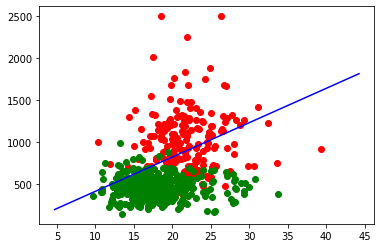

In [ ]:
classifier2.fit_unregularised(X2,y,n_iter = 4000,lr= np.exp(-17),use_jax = False)
classifier2.plot_decision_boundary(X,y,f1,f2)

# Q2


In [11]:
#nested cross validation functions

def nested_cross_validation(k,X,y,n_iter,lr,arr,reg = 'l1'):

  lambda_best = []

  kf1 = KFold(n_splits=k)
  kf1.get_n_splits(X)

  for train_index, test_index in kf1.split(X):

    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #find the best lambda for this test train split
    avg_acc = 0
    best_lmd =0
    for lmd in arr: #for the same training data, we take that lambda which gives highest avg accuracy
      kf2 = KFold(n_splits=k)
      kf2.get_n_splits(x_train)

      acc =0
      for train_index2, test_index2 in kf2.split(x_train):
        
        x_train2,x_valdn = x_train[train_index2], x_train[test_index2]
        y_train2, y_valdn = y_train[train_index2], y_train[test_index2]

        classifier = Logistic_Regression_Two_Class()

        if reg == 'l1':
          classifier.fit_l1_regularised(x_train2,y_train2,n_iter=n_iter,lr=lr,lmd =lmd)  
        else :
          classifier.fit_l2_regularised(x_train2,y_train2,n_iter=n_iter,lr=lr,lmd =lmd)

        acc += get_accuracy(classifier,x_valdn,y_valdn)

      acc = acc/k
      if acc > avg_acc:
        best_lmd = lmd

    lambda_best.append(best_lmd)

  return lambda_best

    

In [16]:
lambdas = [0.001,0.01,0.1,1,10,100,1000]
optimum_lambda_l1 = nested_cross_validation(k=3,X=X,y=y,reg='l1',n_iter=100,lr=np.exp(-18),arr=lambdas)
print(optimum_lambda_l1)

[1000, 1000, 1000]


In [ ]:
# lambdas = [1,100,1000,2000,5000,50000]
# optimum_lambda_l2 = nested_cross_validation(k=5,X=X,y=y,reg='l2',n_iter=80,lr=np.exp(-18),arr=lambdas)

Which are the more important features ? Trying to infer this using L1 regularisation.

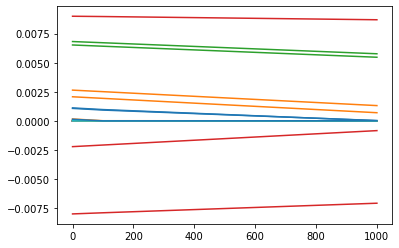

In [ ]:
dic = {} #key will be a feature and value will be an array of values corresponding to different values of lambda
for i in range(X.shape[1]+1):
  dic[i] = []

lambdas = [0.001,0.01,0.1,1,10,100,1000]

for l in lambdas:

  classifier = Logistic_Regression_Two_Class()
  classifier.fit_l1_regularised(X,y,n_iter=100,lr=np.exp(-18),lmd =l)

  for i in range(len(classifier.param)):
    dic[i].append(classifier.param[i]) #value of ith parameter for lambda = lmd



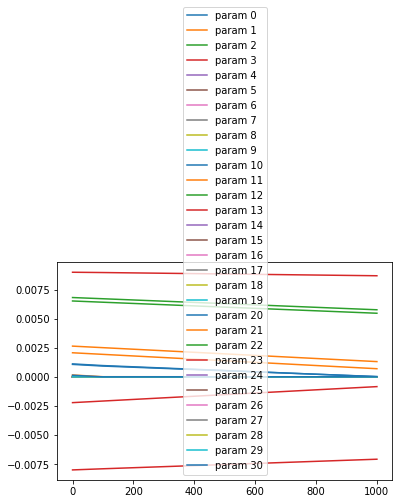

In [ ]:
for i in range(len(dic)):
  plt.plot(lambdas,dic[i],label='param {}'.format(i))
plt.legend()
plt.show()

# Q3

In [ ]:
def process_y(y):
  arr = np.zeros((y.shape[0],10))
  for i in range(y.shape[0]):
    digit = y[i]
    arr[i][digit] = 1

  return arr

In [ ]:
def dervt(X,yhat,y,d): #partial derivative wrt theta_d

  yhat_d = yhat[:,d]
  yhat_d = np.reshape(yhat_d,(yhat_d.shape[0],1))
  y_d = y[:,d]
  y_d = np.reshape(y_d,(y_d.shape[0],1))
  delta_y = np.subtract(yhat_d,y_d)
  X = np.transpose(X)
  return np.dot(X,delta_y)

In [ ]:
def multi_class_cost(X,y,param,thetaj,j):

  #get a vector for jth col prediction
  v = np2.dot(X,thetaj)
  v = np2.exp(v)
  
  yhat = np2.dot(X,param)
  yhat = np2.exp(yhat)

  cost = 0 
  for i in range(y.shape[0]):
    sum = np2.sum(yhat[i,:]) 
    k = y[i] #target class
    if k == j:
      sum += (-1)*yhat[i][j] + v[j]
      cost += np2.log(v[i]/sum)
    else :
      cost += np2.log(yhat[i][k]/sum)

  cost = (-1)*cost
  # print(cost)

  return cost



In [ ]:
class Logistic_Regression_Multi_Class():

  def __init__(self,k,fit_theta0=True):

    self.n_classes = k
    self.fit_theta0 = fit_theta0
    self.param = np.zeros((1,k))
  
  def fit(self,X,y,n_iter=100,lr=np.exp(-10),use_jax=False):

    if self.fit_theta0 : #include bias term
      X = np.insert(X,0,np.ones((X.shape[0],)),axis=1)
    
    if self.param.shape == (1,self.n_classes): #theta matrix not initialized yet
      self.param = np.zeros((X.shape[1],self.n_classes))
    
    if not use_jax:
      y = process_y(y)
    
    for i in range(n_iter):

      if use_jax:
        for j in range(self.n_classes):
          # print(j)
          thetaj = self.param[:,j]
          der = grad(multi_class_cost,3)
          partial = np.array(der(np2.array(X),np2.array(y),np2.array(self.param),np2.array(thetaj),j))
          self.param[:,j] = np.subtract(self.param[:,j],lr*partial)

      else :
        #calculate yhat
        yhat = np.dot(X,self.param)
        yhat = np.exp(yhat)
        for w in range(yhat.shape[0]):
          yhat[w] = yhat[w]/np.sum(yhat[w])
        #use update rule to update respective theta parameters for each prob function
        for j in range(self.n_classes):
          gradnt = dervt(X,yhat,y,j)
          gradnt = np.reshape(gradnt,(X.shape[1],))
          self.param[:,j] = np.subtract(self.param[:,j],lr*gradnt)
    
    return



In [ ]:
#rows = true
#cols = predicted
def confusion_matrix(y,yhat,k):

  arr = np.zeros((k,k))

  acc = 0
  
  for i in range(y.shape[0]):
    indx_tru = y[i]
    indx_pred = np.argmax(yhat[i,:],axis=0)
    arr[indx_tru][indx_pred]+=1
    if indx_tru == indx_pred:
      acc += 1

  acc = acc/y.shape[0]
  
  return arr,acc

In [ ]:
#digits dataset
from sklearn import datasets
digits = datasets.load_digits(return_X_y=True)

In [ ]:
#4-FOLD CV
X = digits[0]
y = digits[1]
kf = KFold(n_splits=4)
kf.get_n_splits(X)

dic_acc = {}
for i in range(10):
  dic_acc[i] = 0
acc =0

for train_index, test_index in kf.split(X):

  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = Logistic_Regression_Multi_Class(10)
  model.fit(x_train,y_train,n_iter=10,lr=np.exp(-18),use_jax=False)

  #predict on test data
  x2 = np.insert(x_test,0,np.ones((x_test.shape[0],)),axis=1) #a col of 1s for the bias term
  yhat = np2.dot(x2,model.param)
  yhat = np2.exp(yhat)
  conf ,a = confusion_matrix(y_test,yhat,10)
  for d in range(10):
    dic_acc[d] += conf[d][d]/np.sum(np.array(conf[d,:]))
  print(conf)
  print(a)
  acc += a

print('avg accuracy = >')
print(acc/4)

[[45.  0.  0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0. 40.  0.  0.  0.  0.  0.  0.  0.  5.]
 [ 0. 10. 33.  0.  0.  0.  1.  0.  2.  0.]
 [ 0.  1.  0. 47.  0.  0.  0.  0.  0.  0.]
 [ 0.  5.  0.  0. 37.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  1.  0. 40.  1.  0.  0.  2.]
 [ 0.  1.  0.  0.  0.  0. 42.  0.  0.  0.]
 [ 0.  3.  0.  0.  4.  0.  0. 38.  0.  0.]
 [ 0. 17.  0.  0.  0.  0.  2.  0. 24.  1.]
 [ 0.  1.  0.  1.  0.  0.  0.  5.  1. 36.]]
0.8488888888888889
[[43.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  3.  0.  0.  0.  6.  0.  3.  0.]
 [ 0.  1. 35.  5.  0.  0.  0.  1.  3.  0.]
 [ 0.  0.  0. 43.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0. 40.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  0.  1. 39.  0.  0.  1.  4.]
 [ 1.  0.  0.  0.  0.  0. 45.  0.  1.  0.]
 [ 0.  0.  0.  0.  2.  1.  0. 42.  0.  0.]
 [ 0. 10.  0.  1.  0.  0.  2.  0. 29.  1.]
 [ 1.  5.  0.  2.  5.  0.  0.  0.  1. 30.]]
0.8463251670378619
[[45.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 38.  2.  0.  0.  0.  5.  0.  0.  0.]
 [ 0.  0. 36. 

In [ ]:
for i in range(10):
  dic_acc[i] =dic_acc[i]*25
dic_acc

{0: 98.35477486392875,
 1: 82.46376811594203,
 2: 80.98387821593079,
 3: 90.7346563460694,
 4: 91.16972345030857,
 5: 84.64975845410628,
 6: 97.29094507669471,
 7: 89.99999999999999,
 8: 59.44698781945076,
 9: 70.6323877068558}



1.   Which two digits get the most confused 

*   Surprisingly, 8 is getting mispredicted as 1 max number of times, between any two pairs of digits. So maximum confusion lies between 1 and 8.

2.   Which digit is the easiest to predict

*   It should be the one that has the highest avg accuracy. And that digit is 0.



In [ ]:
#pca

from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x = pca.fit_transform(digits[0])

In [ ]:
dic = {}
for i in range(10):
  dic[i]=[[],[]]

for i in range(x.shape[0]):
  dic[digits[1][i]][0].append(x[i][0])
  dic[digits[1][i]][1].append(x[i][1])

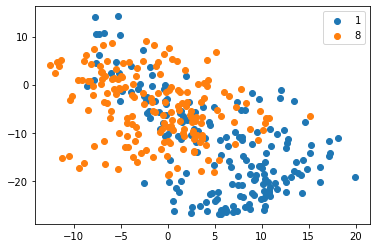

In [ ]:
# Below plot shows why 1 and 8 are get confused so much.
# Since their points are a lot intermerged, given a point in that region, 
# it would be difficult to tell if its a 1 or 8
for i in range(10):
  if i!=1 and i!=8:
    continue
  plt.scatter(dic[i][0],dic[i][1],label=i)
plt.legend()
plt.show()

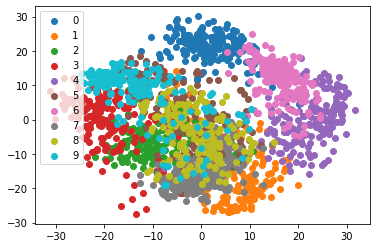

In [ ]:
#0 seems to be quite well separated and hence easy to predict
for i in range(10):
  plt.scatter(dic[i][0],dic[i][1],label=i)
plt.legend()
plt.show()

# Q4

> N = Number of examples,  M = Number of dimensions of an input,  k = Number of classes

*   Time Complexity of Logistic Regression 


1.   Learning  -  O(k*NMk)

2.   Prediction - O(NMk) 



*   Space Complexity of Logistic Regression



1.   Learning => 
X + parameters + yhat + gradnt
= O(NM + Mk + Nk + M) 

2.   Prediction - O(NM + Mk +  Nk) , basically amount of space required to store X and parameters,and the prediction output





# Q5

In [17]:
def softmax(a):
  return np2.exp(a)


def sigmoid(a):
  b = 1 + np2.exp(-a)
  return 1/b


def relu(a):
  return np2.abs(a)*(a>0).astype(float)

def activate(Z,func):

  if func == 0: #relu
    Z = relu(Z)

  elif func == 1: #sigmoid
    Z = sigmoid(Z)
          
  elif func == 3: #softmax
    Z = softmax(Z)
    
  return np2.array(Z)

In [18]:
#will use this function during prediction
def forward_pass(X,W,Biases,actvn_funcs):

  #make a Dict B to store bias matrix for each layer
  B = {}
  for i in range(len(Biases)):
    B[i] = np.array([Biases[i] for k in range(X.shape[0])])
  
  A = X #activation of input layers


  for i in range(len(W)):
    Zi = np2.add(np2.dot(A,np2.transpose(np2.array(W[i]))) , np2.array(B[i]))

    #activation Ai (jth row = activation vector of ith layer for the jth example)
    A = activate(Zi,actvn_funcs[i])  
    

  return A


In [19]:
def loss(X,y,actvn_funcs,j,W,wj,Biases,bj,flag,prblm ):

    #make a Dict B to store bias matrix for each layer
    B = {}
    for i in range(len(Biases)):
      B[i] = np2.array([Biases[i] for k in range(X.shape[0])])


    #forward pass
    A = X
    Zi = 0 
    for i in range(0,j):
      Zi = np2.add(np2.dot(A,np2.transpose(np2.array(W[i]))) , np2.array(B[i]))
      A = activate(Zi,actvn_funcs[i])
    
    #now for the jth layer
    Zj = 0
    if flag == 1: #ie we need partial wrt wts of some layer
      Zj = np2.add(np2.dot(A,np2.transpose(np2.array(wj))) , np2.array(B[j]))
    else :#need partial wrt biases of some layer
      b = np2.array([bj for k in range(X.shape[0])])
      Zj = np2.add(np2.dot(A,np2.transpose(np2.array(W[j]))) , np2.array(b))


    A = activate(Zj,actvn_funcs[j])

    #continue forward prop from layer j+1 onwards
    for i in range(j+1,len(W)):
      Zi = np2.add(np2.dot(A,np2.transpose(np2.array(W[i]))) , np2.array(B[i]))
      A = activate(Zi,actvn_funcs[i])


    cost = 0
    for i in range(y.shape[0]):
      j = y[i]
      if prblm == 0: #classification
        #j=target class
        sum = np2.sum(A[i,:])
        cost -= np2.log(A[i][j]/sum) 
      
      else: #regression
        #j = continous target value 
        cost += (j - A[i])**2


    if prblm == 1:
      cost /= y.shape[0]

    print(cost)
    return cost

In [20]:
class model():

  def __init__(self,ip_shape,layers,activations,n_classes,last_layer_actvn='softmax',prblm = 0):

    self.inputs = ip_shape

    self.layers = []
    for i in layers:
      self.layers.append(i)

    self.outputs = n_classes
    self.last_layer_actvn = last_layer_actvn
    self.prblm = prblm #0 = classification, 1 = regression

    #initialize weights for all layers
    
    self.layers.append(self.outputs) #no of perceptrons in the last layer
    self.weights = {}
    self.weights[0] = 0.00001*np.ones((layers[0],self.inputs )) #W[1]
    for i in range(1,len(self.layers)):
      self.weights[i] = 0.00001*np.ones((self.layers[i],self.layers[i-1]))

    #initialize biases for all layers
    self.biases = {}
    for i in range(len(self.weights)):
      self.biases[i] = 0.00001*np.ones((self.layers[i],))

    #initialize activation functions for each layer
    self.actvn_funcs = []
    dic = {'relu':0,'sigmoid':1,'identity':2,'softmax':3}
    for i in activations:
      self.actvn_funcs.append(dic[i])
    self.actvn_funcs.append(dic[self.last_layer_actvn])

    return


  def fit(self,X,y,n_iter=100,lr=np.exp(-10)):


    for i in range(n_iter):
      print(i)
      #update weights of each layer
      for j in range(len(self.weights)):
        partial = grad(loss,5)
        partial = np.array(partial(np2.array(X),np2.array(y),np2.array(self.actvn_funcs),j,self.weights,np2.array(self.weights[j]),self.biases,0,1,self.prblm))
        self.weights[j] = np.subtract(self.weights[j],lr*partial)

      #update biases of each layer
      for j in range(len(self.biases)):
        partial = grad(loss,7)
        partial = np.array(partial(np2.array(X),np2.array(y),np2.array(self.actvn_funcs),j,self.weights,np2.array(self.weights[j]),self.biases,np2.array(self.biases[j]),0,self.prblm))
        self.biases[j] = np.subtract(self.biases[j],lr*partial)
    

    return


  def predict(self,X,prblm):

    Alast = np.array(forward_pass(X,self.weights,self.biases,self.actvn_funcs))
    yhat = np.zeros((Alast.shape[0],))

    if prblm == 0:
      for i in range(Alast.shape[0]):
        trgt_cls = np.argmax(Alast[i,:])
        yhat[i] = trgt_cls
    else:
      for i in range(Alast.shape[0]):
        yhat[i] = Alast[i]

    return yhat


In [21]:
class performance():

  def __init__(self):
    return
  
  def accuracy(self,y,yhat):

    ans = 0
    for i in range(len(y)):
      if y[i] ==  yhat[i]:
        ans+=1
    print(ans)
    print(len(yhat))
    return ans/len(y)

  def mse(self,y,yhat):

    ans = 0
    for i in range(len(y)):
      ans += (y[i]-yhat[i])**2
    
    ans /= len(y)
  
    return ans


In [22]:
#3FOLD CV

def test_model(X,y,layers,activations,n_classes,last,flag,lr,itrs):

  kf = KFold(n_splits=3)
  kf.get_n_splits(X)

  p = performance()
  if flag == 0: #classification model
    acc = 0
  else : #regression model
    mse = 0

  for train_index, test_index in kf.split(X):
     
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      nn = model(ip_shape=X_train.shape[1],layers=layers,activations=activations,n_classes=n_classes,last_layer_actvn=last,prblm=flag)
      nn.fit(X_train,y_train,n_iter=itrs,lr=lr)
      print('fit done')
      yhat = nn.predict(X_test,flag)
      if flag == 0:
        a = p.accuracy(y_test,yhat)
        print(a)
        acc += a
      else :
        mse += p.mse(y_test,yhat)

    
  if flag == 0:
      return acc/3
    
  else :
      return mse/3

# Q6

In [ ]:
#regression

from sklearn import datasets
boston_housing = datasets.load_boston(return_X_y=True)

In [ ]:
X = boston_housing[0]
y = boston_housing[1]
actvns = ['relu'] #activations of hidden layers
lyrs = [64] #1 hidden layer with 64 neurons

In [ ]:
mse = test_model(X,y,lyrs,actvns,1,'relu',1,np.exp(-11),200)

0
Autograd ArrayBox with value [625.99710936]
Autograd ArrayBox with value [625.99704239]
Autograd ArrayBox with value [625.99675234]
Autograd ArrayBox with value [625.99675234]
1
Autograd ArrayBox with value [625.96171158]
Autograd ArrayBox with value [625.96147742]
Autograd ArrayBox with value [625.96092859]
Autograd ArrayBox with value [625.96092858]
2
Autograd ArrayBox with value [625.92589022]
Autograd ArrayBox with value [625.92526049]
Autograd ArrayBox with value [625.92411019]
Autograd ArrayBox with value [625.92411019]
3
Autograd ArrayBox with value [625.88907429]
Autograd ArrayBox with value [625.88753214]
Autograd ArrayBox with value [625.88499909]
Autograd ArrayBox with value [625.88499907]
4
Autograd ArrayBox with value [625.8499658]
Autograd ArrayBox with value [625.84632909]
Autograd ArrayBox with value [625.84062379]
Autograd ArrayBox with value [625.84062376]
5
Autograd ArrayBox with value [625.80559348]
Autograd ArrayBox with value [625.79715299]
Autograd ArrayBox wit

In [ ]:
mse
#avg value of rmse = (sqrt(83.49624545)+ sqrt(65.28731267) + sqrt(65.89012112))/3 = 8.4

103.69318928023465

In [23]:
#classification

from sklearn import datasets
digits = datasets.load_digits(return_X_y=True)

In [24]:
actvns= ['sigmoid']
lyrs = [90]
assert(len(actvns)==len(lyrs))
X = digits[0]
y = digits[1]

In [25]:
a = test_model(X=X,y=y,layers=lyrs,activations=actvns,n_classes=10,last='softmax',flag=0,lr=np.exp(-9),itrs=800)

0
Autograd ArrayBox with value 2758.4969414068714
Autograd ArrayBox with value 2758.4969414068714
Autograd ArrayBox with value 2758.3031544884107
Autograd ArrayBox with value 2758.303154480174
1
Autograd ArrayBox with value 2758.298595427129
Autograd ArrayBox with value 2758.297039924397
Autograd ArrayBox with value 2758.211578817585
Autograd ArrayBox with value 2758.2115788077886
2
Autograd ArrayBox with value 2758.209620854776
Autograd ArrayBox with value 2758.205297109139
Autograd ArrayBox with value 2758.1662851154247
Autograd ArrayBox with value 2758.1662851088463
3
Autograd ArrayBox with value 2758.165466979702
Autograd ArrayBox with value 2758.15843468583
Autograd ArrayBox with value 2758.139712461082
Autograd ArrayBox with value 2758.139712457728
4
Autograd ArrayBox with value 2758.139392771408
Autograd ArrayBox with value 2758.130025689256
Autograd ArrayBox with value 2758.1203672699107
Autograd ArrayBox with value 2758.1203672686165
5
Autograd ArrayBox with value 2758.1202580

KeyboardInterrupt: ignored

# Q7

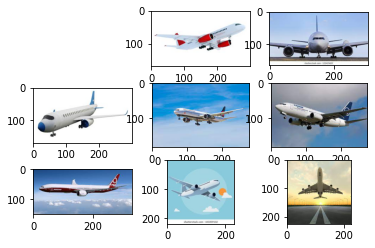

In [ ]:
# plot aeroplane photos from the aeroplanes vs penguins dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/train/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'a' + str(i) + '.jpeg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

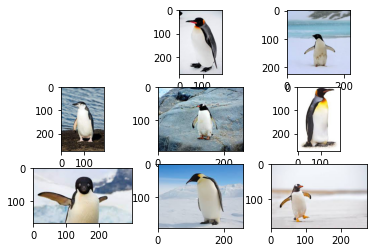

In [ ]:
# plot penguin photos from the aeroplanes vs penguins dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/train/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'p' + str(i) + '.jpeg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = '/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['aeroplanes/', 'penguins/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('p'):
		dst = dataset_home + dst_dir + 'penguins/'  + file
		copyfile(src, dst)
	elif file.startswith('a'):
		dst = dataset_home + dst_dir + 'aeroplanes/'  + file
		copyfile(src, dst)

In [ ]:
# baseline model with dropout for the aeroplanes vs penguins dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 61 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 54.545


In [ ]:
# baseline model with data augmentation for the aeroplanes vs penguins dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 61 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 86.364


In [ ]:
# vgg16 model used for transfer learning on the aeroplanes vs penguins dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/content/drive/MyDrive/Sem6/MachineLearning/Assignment3/dataset_aeroplanes_vs_penguins/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

58892288/58889256 [==============================] - 0s 0us/step
Found 61 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1/1 [==============================] - 25s 25s/step - loss: 7.6090 - accuracy: 0.4590 - val_loss: 0.8532 - val_accuracy: 0.9545
Epoch 2/10
1/1 [==============================] - 24s 24s/step - loss: 0.5979 - accuracy: 0.9016 - val_loss: 1.0375 - val_accuracy: 0.9545
Epoch 3/10
1/1 [==============================] - 24s 24s/step - loss: 1.6374e-07 - accuracy: 1.0000 - val_loss: 1.1859 - val_accuracy: 0.9545
Epoch 4/10
1/1 [==============================] - 24s 24s/step - loss: 1.0084e-11 - accuracy: 1.0000 - val_loss: 1.3394 - val_accuracy: 0.9545
Epoch 5/10
1/1 [==============================] - 23s 23s/step - loss: 9.8190e-14 - accuracy: 1.0000 - val_loss: 1.4242 - val_accuracy: 0.9545
Epoch 6/10
1/1 [==============================] - 23s 23s/step - loss: 8.8254e-15 - accuracy: 1.0000 - val_loss: 1.4958 - val_accuracy: 0.9545
Epoch 7/10
1/1 [==============================] - 23s 23s/step - loss: 6.8053e-16 - accuracy: 1.0000 - val_loss: 1.5643 - val_accuracy: 0.9545
Epoch 8

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 95.455
